# Practical session 1. Mendelian peas

In this session we will explore how to deal with probability functions and Bayes theorem computationally. The first step in any python script is loading the libraries that we will use. 
Feel free to use the internet to find information on these libraries. It is specially useful to understand how to navigate their online documentation. For instance scipy (https://docs.scipy.org/). 


In [3]:
import numpy as np # numpy is the standard numeric library
import scipy.stats as ss # scipy is the scientific library, the stats module contains different functions
import matplotlib.pyplot as plt # matplotlib is the standard plotting library
import seaborn as sns # library for statistical plotting

# ### Part 1: Warming up: Conditional probabilities

We will start with some analytical derivations, you will not need pytong for this part.
In the paradigmatic genetics example (i.e., Mendel and the peas) studying the prevalence of a dominant and recesive genes, we know the following:
- There are two alleles of the gene: Y is dominant and y is recessive. The former corresponds to yellow peas and the latter to green peas.
- We assume that peas are diploid. Therefore, their genotype can be homozygote (YY or yy) or heterozygote (yY, Yy). We assume equal probabilities for alleles, so: P(homozygote) = P(heterozygote) = 1/2.

**Question 1.1** What is the probability of observing a yellow pea $P(\mathrm{yellow})$? 3/4

**Question 1.2** What is the probability that a yellow pea is heterozygote $P(\mathrm{heteroz.}|\mathrm{yellow})$? 2/3

**Question 1.3** What is the probability that a pea is yellow and heterozygote $P(\mathrm{heteroz.}\,,\mathrm{yellow})$? 1/2

**Question 1.4** Use the Bayes' theorem to calculate the probability that a pea is yellow knowing that it is heterozygote $P(\mathrm{yellow}|\mathrm{heteroz.})$? 

P(A|B) = P(B|A)*P(A)/P(B)

= 2/3 * 3/4 / 1/2
= 1



### Part 2: Manipulating probabilities with Python

A neighbour of Mendel sneaks in Mendel's garden at night and picks 10 peas at random. **What is the probability that he gets exactly 5 yellow peas?**

This question can be answered in 3 different ways. Let's try to implement them one by one: 

#### Method 1 - Brute Force
Sometimes we do not know the mathematical closed form of a distribution, but we know how to sample it. In these cases, we can build an empirical distribution function. For instance, in this case we can simulate many times the experiment: generate computationally 10 peas that can be green or yellow at random with the corresponding probability and counting the number of yellow peas. Here you have a function that generates 1 experiment:

In [7]:
## All these three functions do the same and are interchangable,
# they reproduce the experiment of selecting 10 peas at random
# have a look at them and make sure you understand the python syntax used in each of them

def peas_experiment():
    results = [] # empty list that will be filled with each draw of a pea
    # for each draw we want to add a 1 if the pea is yellow
    # or a 0 if the pea is green
    for i in range(10): # for each pea 1,2,3,4...,10
        if np.random.rand()<3/4: # np.random.rand() generates a uniform random number in the range [0,1) 
            results.append(1)
        else:
            results.append(0)
    return results
    
def peas_experiment_pythonic():
    # the function above is non-pythonic, we try to avoid loops in python.
    # A cleaner way of writing the same function is
    return [int(x<3/4) for x in np.random.rand(10)] # np.random.rand(10) returns 10 randos between 0 and 1


def peas_experiment_scipy(): 
    # another alternative is using the scipy.stats functions that contain implemented probability distributions
    # in our case we want to repeat a Bernoulli experiment 10 times.
    # A Bernoulli experiment is throwing a coin that is rigged to one side with a certain probability
    return ss.bernoulli.rvs(p = 3/4,size = 10)


**Question 2.1** Run one of the function defined in the previous cell 1000 times and store for each of them the number of yellow peas observed. Which is the fraction of times you observe 5 yellow peas?

In [8]:
## Test of the functions above. As an example we are calling peas_experiment() 

print("Here are three independent realizations of the experiment:")
for N in range(3):
    print(peas_experiment_pythonic())

#Here you should write the code that returns the answer. 

total = 0
for i in range(1000):
    if(sum(peas_experiment_pythonic())) == 5:
        total = total + 1

print("\n The number of times exactly 5 yellow peas were picked in 1000 trials:")
print(total)
print("\n Proportion:")
print(total/1000)
    

Here are three independent realizations of the experiment:
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

 The number of times exactly 5 yellow peas were picked in 1000 trials:
54

 Proportion:
0.054


**Question 2.2 (optional)** Find a credibility/confidence interval to the answer to Question 2.1. 

In [9]:
# You can write your code here

**Question 2.3 (optional)** The three functions `peas_experiment()`, `peas_experiment_pythonic()`, and `peas_experiment_scipy()` do the same, but they have different efficiency. Calculate how much time it takes for them to run 1000 experiments, you can use the library `time`. 

In [10]:
# You can write your code here


import timeit


execution_time = timeit.timeit(peas_experiment, number=1000)  # Runs the function 1000 times
print(f"Average time for 1000 runs: {execution_time:.6f} seconds")


execution_time = timeit.timeit(peas_experiment_pythonic, number=1000)  # Runs the function 1000 times
print(f"Average time for 1000 pythonic run: {execution_time:.6f} seconds")


execution_time = timeit.timeit(peas_experiment_scipy, number=1000)  # Runs the function 1000 times
print(f"Average time for 1000 scipy run: {execution_time:.6f} seconds")

    # slower as simming its own distrib



Average time for 1000 runs: 0.013207 seconds
Average time for 1000 pythonic run: 0.027485 seconds
Average time for 1000 scipy run: 0.041583 seconds


#### Method 2 - Scipy binomial distribution
The binomial pmf (probability mass function, or discrete probability distribution) describes the probability of observing $n$ events when sampling $N$ times if each event has a probability $p$ of occurring within each sample. This is exactly the probability distribution that we need.

**Question 2.4** Look for the scipy implementation of the binomial distribution and solve the question. Note that scipy probability distributions are python classes with different methods (functions)


In [11]:
#Here you should write the code that returns the answer.

from scipy.stats import binom

print(binom.pmf(k = 5, n = 10, p = 0.75)*1000)

print(ss.binom.pmf(5,10,0.75))

58.399200439453146
0.058399200439453146


#### Method 3 - Analytical binomial distribution
**Question 2.5** The binomial pmf has a simple analytical closed form. Find the formula (no python required) to solve the same question 2.4. Compare the results obtained in Methods 1,2, and 3. Are they the same? why?

10!/5!(10-5)! * 0.75^5*(0.25)^5

**Question 2.6** Instead of the original question "What is the probability that he gets exactly 5 yellow peas?", we could ask a more general question: **What is the probability that he gets exactly n yellow peas?**. Generate a histogram of the probability of getting $n$ yellow peas. As an example here is a piece of code to plot a histograms with hypothetical data:

,Number of yellow peas,Probability
0,0,9.536743e-07
1,1,2.861023e-05
2,2,3.862381e-04
3,3,3.089905e-03
4,4,1.622200e-02
5,5,5.839920e-02
6,6,1.459980e-01
7,7,2.502823e-01
8,8,2.815676e-01
9,9,1.877117e-01


<Axes: xlabel='Number of yellow peas', ylabel='Probability'>

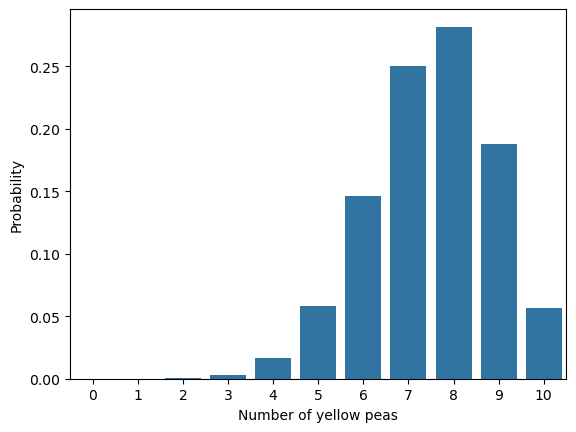

In [5]:
import pandas as pd # One possible way of summarizing data in python is using dataframes with the library pandas
data1 = pd.DataFrame({
    'Number of yellow peas': range(11), # the names of the fields ('Bins', 'Counts', 'Source') are arbitrary
    'Probability': [ss.binom.pmf(i,10,0.75) for i in range(11)], # put binom data there
})
 
display(data1)
sns.barplot(data1, x = 'Number of yellow peas', y = 'Probability')



**Question 2.7** What is the probability that he gets **at least** 5 yellow peas? You can solve this using the cumulative density function CDF. Check it at the documentation of the binomial at scipy. 

### Part 3 : Introducing priors: Bayesian inference

The neighbour picked a certain number $N$ of peas. They remember that 5 of them were yellow, but they do not remember the exact total number $N$ of peas they picked. The only think that they remember is that they picked between $N=5$ and $N=10$ peas. What is the most probable value of $N$?

Note that this is a Bayesian problem! We have a parameter $N$ that we want to infer. We have a prior knowledge of $N$ (a number between 5 and 10). We also know from Part 2 the probability (likelihood) of obtaining $n=5$ peas given different possible values of $N$.

**Question 3.1** Use Bayes' theorem to frame the problem analytically


**Question 3.1** The next code can be used to solve the problem numerically by evaluating the posterior distribution at different values of $N$.  What is the most probable value of $N$?


In [3]:
rangeN = range(5,11) # possible values of N 
likelihoodN = [ss.binom.pmf(5,N,3/4) for N in rangeN]
idx = np.argmax(likelihoodN)

print("N    Likelihood")
for i in range(6):
    print(rangeN[i], likelihoodN[i])

N    Likelihood
5 0.2373046875
6 0.35595703124999994
7 0.31146240234375
8 0.20764160156249994
9 0.11679840087890629
10 0.058399200439453146


**Question 3.2** How would the result of Question 1.5 change if you know the information that the initial random number of peas $N$ was selected from a Poisson distribution of mean $\langle N \rangle = 10$

In [4]:
rangeN = range(5,11)

likelihoodN = ss.binom.pmf(5,rangeN,3/4) # the variable is N
    # we saw 5 successes. This is the likelihood of seeing 5 successes from N (5,6,7...) trials

rangeN
likelihoodN

priorN = ss.poisson.pmf(rangeN, 10) # the belief about the parameter
posteriorN = likelihoodN*priorN 

print("N        Likelihood         Prior        Posterior")
for i in range(6):
    print(rangeN[i], likelihoodN[i], priorN[i], posteriorN[i])

print("The most prob value from likelihood is: N={}", format(rangeN[np.argmax(likelihoodN)]))
print("The most prob value from prior is: N={}", format(rangeN[np.argmax(priorN)]))
print("The most prob value from posterior is: N={}", format(rangeN[np.argmax(posteriorN)]))

N        Likelihood         Prior        Posterior
5 0.2373046875 0.03783327480207079 0.008978013454007033
6 0.35595703124999994 0.06305545800345125 0.022445033635017556
7 0.31146240234375 0.090079225719216 0.028056292043771927
8 0.20764160156249994 0.11259903214902009 0.023380243369809952
9 0.11679840087890629 0.12511003572113372 0.014612652106131262
10 0.058399200439453146 0.12511003572113372 0.007306326053065631
The most prob value from likelihood is: N={} 6
The most prob value from prior is: N={} 9
The most prob value from posterior is: N={} 7


**Question 3.3** In this case we could solve the problem without requiring any sophisticated sampling. Nevertheless let's try to solve the same problem using pyMC, a Python library for numerical Bayesian inference. The code below solves the problem for question 1.6 where the prior distribution was a uniform distribution between N = 5 and N = 10. Two addicional Jupyter cells are included plotting the MCMC traces, and a histogram of the results. Run the code and compare the results with your results of answer 1.6 by plotting both posterior distributions together

In [ ]:
import pymc as pm # library for Bayesian MCMC inference

with pm.Model() as Pea_Model:
    N = pm.DiscreteUniform("N",5,10) # Our prior distribution for N is a discrete uniform- each integer is equal prob
    yellow_Likelihood = pm.Binomial("Yellow", n=N, p = 3/4, observed = 5) # Likelihood of observing 5 yellow peas is
    #a binomial of picking N peas each one with a probability p=3/4 of being yellow
    mcmc_sample = pm.sample(4000, chains = 2, return_inferencedata = True)    

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [N]


Output()

Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
N,6.841,1.39,5.0,9.0,0.031,0.022,2017.0,1921.0,1.0


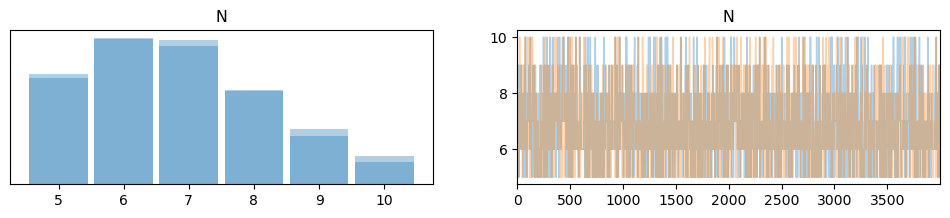

In [7]:
import arviz as az # arviz is a library useful to plot an analyze MCMC chains, 
az.plot_trace(mcmc_sample, compact = False) # plot of posterior and traces
az.summary(mcmc_sample) # summary of MCMC statistics

<Axes: xlabel='N', ylabel='counts'>

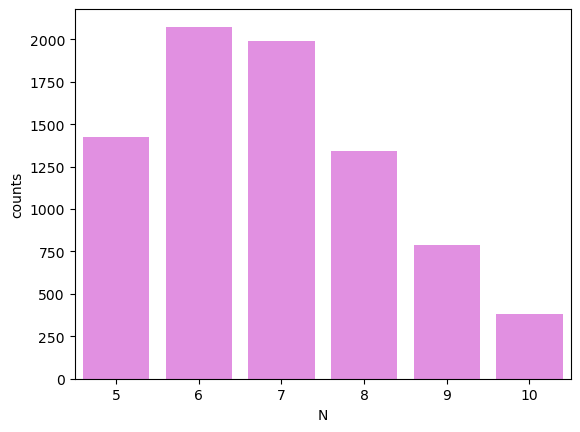

In [6]:
# arvix is very useful, but sometimes you want to extract the traces data to extract particular information
# The object mcmc_sample is an xarray with many information, we can extract just the posterior values of N as:
posteriorN = mcmc_sample.posterior.N # extract the values of N for the posterior distribution
posteriorN_all = posteriorN.values.ravel() # flatten the array to gather all the chains in a single array

# You can use posteriorN_all to compare the results with your values from 
# Since the data is discrete You can count how many occurrences for each value of N in the posterior
values_N, counts_N = np.unique(posteriorN_all, return_counts=True)
data = pd.DataFrame({'N': values_N, 'counts': counts_N})
sns.barplot(data, x = 'N', y ='counts', color = 'violet')

**Question 3.4** Analyze the MCMC statistics given by az.summary(). Has the MCMC converged?

**Question 3.5 (Optional)** ``az.summary()`` was used in Q3.4 to analyze the convergence of the MCMC. One of the statistics used is ``ess_tail``. Used to calculate the effective size in the tail. Can you find in the source code of ``arviz`` library how the tail is calculated?

**Question 3.6** Copy the code in Q3.4 and modify it to answer question Q3.3 (Poisson prior) 

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [N]


Output()

Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
N,7.506,1.634,5.0,10.0,0.04,0.028,1692.0,1832.0,1.0


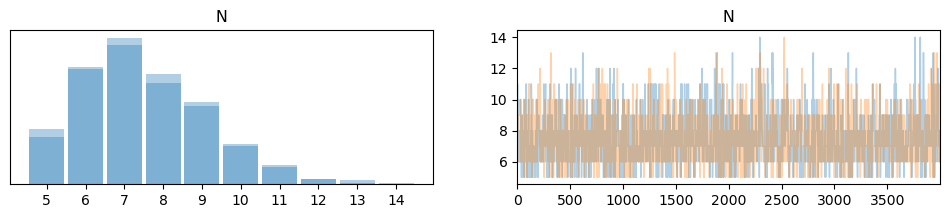

In [9]:
 

with pm.Model() as Pea_Model_2:
    N = pm.Poisson("N",10) # Our prior distribution for N is a discrete uniform- each integer is equal prob
    yellow_Likelihood = pm.Binomial("Yellow", n=N, p = 3/4, observed = 5) # Likelihood of observing 5 yellow peas is
    #a binomial of picking N peas each one with a probability p=3/4 of being yellow
    mcmc_sample2 = pm.sample(4000, chains = 2, return_inferencedata = True)    

import arviz as az # arviz is a library useful to plot an analyze MCMC chains, 

az.plot_trace(mcmc_sample2, compact = False) # plot of posterior and traces
az.summary(mcmc_sample2) # summary of MCMC statistics